In [131]:
import pandas as pd
from datetime import date
import numpy as np
from numpy import NaN, NAN,nan
import matplotlib.pyplot as plt
%matplotlib inline

## 0. Introduction

### In this project, we will implement the continuous-time Markowitz model on the real data.

## 1. Read the data.

### First we read the data files 'price_data.csv' and 'risk_free_monthly.csv' into dataframes. 'price_data.csv' contains monthly price data of 20 stocks from the end of 2004 to the end of 2014. 'risk_free_monthly.csv' contains monthly risk-free rate from 2004-12-31 to 2014-12-31.

In [132]:
# Read data from csv files in form of pd.DataFrame 
# and set index column to be date
#########Your code here#######################
data = pd.read_csv("price_data.csv")
data.index=data["date"]
data.drop(columns=['date'],inplace=True)


risk_free_data =pd.read_csv("risk_free_monthly.csv")
risk_free_data.index=risk_free_data["DATE"]
risk_free_data.drop(columns=['DATE'],inplace=True)
##############################################

### Each column represents the prices of one particular stock. The column index represents the stock tickers and the row index presents the date, from 2004-12-31 to 2014-12-31. Let's look at first 5 rows of the data in following cell.

In [133]:
data.head()

,BAC,C,CSCO,CVX,GE,IBM,INTC,JNJ,JPM,MRK,MSFT,ORCL,PEP,PFE,PG,T,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,
2004-12-31,46.990002,481.800003,19.320000,52.509998,36.500000,98.580002,23.389999,63.419998,39.009998,32.139999,26.719999,13.72,52.200001,26.889999,55.080002,25.770000,36.380845,31.075001,52.820000,51.259998
2005-01-31,46.369999,490.499992,18.040001,54.400002,36.130001,93.419998,22.450001,64.699997,37.330002,28.049999,26.280001,13.77,53.700001,24.160000,53.230000,23.760000,31.962339,30.650000,52.400002,51.599998
2005-02-28,46.650002,477.200012,17.420000,62.080002,35.200001,92.580002,23.990000,65.599998,36.549999,31.700001,25.160000,12.95,53.860001,26.290001,53.090000,24.059999,32.303606,29.690001,51.610001,63.310001
2005-03-31,44.099998,449.399986,17.889999,58.310001,36.060001,91.379997,23.230000,67.160004,34.599998,32.369999,24.170000,12.48,53.029999,26.270000,53.000000,23.690001,31.881512,29.900000,50.110001,59.599998
2005-04-29,45.040001,469.599991,17.270000,52.000000,36.200001,76.379997,23.520000,68.629997,35.490002,33.900002,25.299999,11.56,55.639999,27.170000,54.150002,23.799999,32.150933,29.969999,47.139999,57.029999


In [134]:
risk_free_data.head()

,risk_free_monthly
DATE,
2004-12-31,0.003460
2005-01-31,0.003380
2005-02-28,0.003556
2005-03-31,0.003668
2005-04-29,0.003436


## 2. Reviews of Financial Market and Markowitz Model

### There is one risk-free asset whose sde is
$$dS_t^0 = r_tS_t^0 dt,$$

where $r_t$ is the risk-free rate.

### We assume the $n$ stocks follow the geometric Brownian Motion (also the number of stocks equals to that of Brownian Motion, no arbitrage and market is complete), whose dynamics are described by following SDE:
$$dS_t^i = S_t^i (\mu_t^i dt + \sum\limits_{j = 1}^{n} \sigma_t^{ij} dW^j_t),\ i = 1,2,...,n.$$

### Suppose a investor who invests $\pi^i_t$ dolloars in ith stock, then the wealth process $x_t$ of this investor will follow
\begin{equation}
dx_t = (r_tx_t + B_t^\top\pi_t) dt + \pi_t^\top\sigma_t dW_t,
\end{equation}
where $B_t = (\mu^1_t - r_t, ..., \mu^{n}_t - r_t)^\top$, $W_t = (W^1_t, ..., W^{n}_t)^\top$, $\pi_t = (\pi^1_t, ..., \pi^{n}_t)^\top$ and $\sigma_t = (\sigma_t^{ij})_{ij}$. 

### The formulation of Markowitz problem is as 
\begin{equation}
\begin{aligned}
\text{Minimize  } &J(\pi) = \text{Var} (x_T),\\
\text{subject to  } &\mathbb{E}[x_T] = z,\\
& dx_t = (r_tx_t + B_t^\top\pi_t) dt + \pi_t^\top\sigma_t dW_t.
\end{aligned}
\end{equation}

### In Section 2 of Lecture 18, we have solved the above Markowitz model and obtained its optimal portfolio as
\begin{equation}
\begin{aligned}
\pi_t^\ast &= -(\sigma_t^\top)^{-1}\lambda_t(x_t^\ast - \theta \exp(-\int_t^T r_s ds))\\
           &= -(\sigma_t\sigma_t^\top)^{-1}B_t(x_t^\ast - \theta \exp(-\int_t^T r_s ds)),
\end{aligned}
\end{equation}
where
$$\theta = \frac{z\exp(\int_0^T |\lambda_s|^2 ds) - x_0 \exp({\int_0^T r_s ds})}{\exp(\int_0^T |\lambda_s|^2 ds) - 1},$$
and $\lambda_t = \sigma^{-1}_t B_t$.

## 3. Numerical Experiment

### In this numerical experiment, we construct a portfolio according to Markowitz model on 2009-12-31 . At the end of each following month, we will rebalance our portfolio according to the optimal portfolio formula until 2014-12-31. In the end, we will plot the realized wealth process.

### 3.0 Background setting. 

<ol>
  <li>$n = 20$. We have $20$ stocks in total.</li>
  <li>Time $0$ indicates time 2009-12-31. Each month diffrence is $1$. In the data 2009-12-31 corresponding to index $60$, so we will define a data-start-time = 60 in implementation. But theoretically, 2009-12-31 corresponding to time $0$.</li>
  <li>$T = 60$. This represents $60$ months from 2009-12-31 to 2014-12-31.</li>
  <li>$x_0 = 1$. The initial wealth for us is $1$ dollar.</li>
  <li>$z = 1.4$. The target wealth for us is $1.4$ dollar (annualized return rate is approximate 7%).</li>
    
</ol>

In [135]:
#####Initialization#################
n = 20
T = 60
x0 = 1
z = 1.4
data_start_time = 60

### 3.1 Estimate Parameters

### We will use a transformation of 10-year Treasury yield rate at the end of each month as the risk-free rate $r_t$. Then what we left is to estimate the parameters $\mu_t^i$ and $\sigma^{ij}_t$ in each month. First, we can solve the SDE of $S_t^i$ and obtain 
\begin{equation}
\log(S_t^i) = \log(S_0^i) + \int_0^t (\mu_t^i - \frac{1}{2} \sum\limits_{j=1}^{20} (\sigma^{ij}_t)^2) dt + \int_0^t\sum\limits_{j=1}^{20} \sigma_{t}^{ij}dW_t^j.
\end{equation}

### So the difference between $S_t^i$ and $S_{t+1}^i$ is 
$$\log(S_{t + 1}^i) - \log(S_t^i) = \int_t^{t+1} (\mu_t^i - \frac{1}{2} \sum\limits_{j=1}^{20} (\sigma^{ij}_t)^2) dt + \int_t^{t+1}\sum\limits_{j=1}^{20} \sigma_{t}^{ij}dW_t^j.$$

### Now we assume that, each coefficent will not change during one month, thus the difference can be rewrite as
$$R_t^i := \log(S_{t + 1}^i) - \log(S_t^i)  =  (\mu_t^i - \frac{1}{2} \sum\limits_{j=1}^{20} (\sigma^{ij}_t)^2) + \sum\limits_{j=1}^{20} \sigma_{t}^{ij}Z^j,$$

### where $Z^j\sim N(0,1),\ j=1,2,...,20$ and is independent with each other.

### If we denote $\bar{\sigma}_t^{i} = (\sigma_t^{i1}, \sigma_t^{i2}, ..., \sigma_t^{i20})^\top$, then $R_t^i$ can be simplified as
$$R_t^i = \left[\mu_t^i - \frac{1}{2}(\bar{\sigma}_t^{i})^\top \bar{\sigma}_t^{i}\right] +  (\bar{\sigma}_t^{i})^\top Z,$$
where $Z = (Z^1, ..., Z^{20})^\top.$

### Now, we talk about how to use $R_t^i$ to estimate parameters. Here I want to emphasize that, in order to implement Markowitz portfolio, we only need to estimate $\mu_t^i$ and $(\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j$ for each $i,j = 1,2,...,20$. You will see the reason later.

### It is not hard to see that $cov(R_t^i, R_t^j) = (\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j$. As a result, we can use sample covariance of $R_t^i$ and $R_t^j$ to estimate $(\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j$.  Now we define $\Sigma_t$ is a $20\times 20$ matrix whose element at ith row and jth column is $(\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j$ (i.e., $\Sigma_t:=((\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j)_{ij}$.

### Then we look at the mean of $R_t^i$ and we can know $\mathbb{E}[R_t^i] = \mu_t^i - \frac{1}{2}(\bar{\sigma}_t^{i})^\top \bar{\sigma}_t^{i}.$ Since we have already estimate $(\bar{\sigma}_t^{i})^\top \bar{\sigma}_t^{i}$ by the covariance, then we are able to estimate $\mu_t^i$ using $\mu_t^i = \mathbb{E}[R_t^i] + \frac{1}{2}(\bar{\sigma}_t^{i})^\top \bar{\sigma}_t^{i}$.

### In conlusion, we can estimate $(\bar{\sigma}_t^{i})^\top\bar{\sigma}_t^j$ by sample covariance of $R_t^i$ and $R_t^j$ which is $\Sigma_t^{ij}$, and estimate $\mu_t^j$ by $\mu_t^i = \mathbb{E}[R_t^i] + \frac{1}{2}cov(R_t^i, R_t^i) = \mathbb{E}[R_t^i] + \frac{1}{2}\Sigma_t^{i,i}$.

### In this experiment, we will use previous 5 years data to estimate the parameters. For example, if we are at 2009-12-31, then we will use the data from 2004-12-31 to 2009-12-31 to estimate the parameters.

### In the following cell, we define a function who will return estimators of $B_t$ and $\Sigma_t$ at time t.

In [136]:
def estimate_paras(t):
    t = t + data_start_time
    training_period = 5 * 12 
    train_data = data.iloc[t - training_period: t + 1, :] 
    
    log_price = np.log(train_data)
    return_data =log_price.diff()
    
    return_data = return_data.dropna() 
    sigma = return_data.cov() 
    mean_v = return_data.mean()
    
    mu = [mean_v[i]+0.5*sigma.iloc[i,i] for i in range(len(mean_v))]
    mu = pd.DataFrame(mu,index=mean_v.index)
    
    r = risk_free_data["risk_free_monthly"].values[t]
    Bt = mu - r ##obtain B_t
    return Bt, sigma


### Then we need calculate value of $|\lambda_t|^2$ using $|\lambda_t|^2 = B_t^\top (\sigma^{-1}_t)^\top \sigma^{-1}_tB_t = B_t^\top (\sigma_t\sigma^{\top}_t)^{-1}B_t = B_t^\top \Sigma_t^{-1}B_t$. The function is writen in following cell.

In [137]:
def lambda_square(Bt, sigma):
    Bt=np.asarray(Bt)
    return np.matmul(np.matmul(Bt.T,np.linalg.inv(np.asarray(sigma))),Bt)

### Next let's calculate the value of $\theta$ using the formula:
$$\theta = \frac{z\exp(\int_0^T |\lambda_s|^2 ds) - x_0 \exp({\int_0^T r_s ds})}{\exp(\int_0^T |\lambda_s|^2 ds) - 1}.$$
### There's a problem. We only know the value of $\lambda_0$ and $r_0$ at time $0$. So here we have to estimate all of the following values using the  $\lambda_0$ and $r_0$. To be precise, we will use following formula to calculate $\theta$:
$$\theta = \frac{z\exp(|\lambda_0|^2 T) - x_0 \exp({r_0 T})}{\exp(|\lambda_0|^2 T) - 1}.$$

In [138]:
def risk_free_value(t):
    """find the risk free rate at time t"""
    #########Your code here#######################
    t = t + data_start_time
    return risk_free_data["risk_free_monthly"].values[t] ### Type here ###
    ##############################################
def calculate_theta():
    """calculate theta by the previous formula"""
    Bt, sigma = estimate_paras(0)
    lambda_2_val = lambda_square(Bt, sigma)
    r = risk_free_value(0)
    #########Your code here#######################
    theta =(z*np.exp(lambda_2_val*T)-x0*np.exp(r*T))/(np.exp(lambda_2_val*T)-1) ### Type here ###
    ##############################################
    return theta[0][0]

### Now we have everything to calculate portfolio $\pi_t^\ast$:
\begin{equation}
\begin{aligned}
\pi_t^\ast &= -(\sigma_t\sigma_t^\top)^{-1}B_t(x_t^\ast - \theta \exp(-\int_t^T r_s ds)),
\end{aligned}
\end{equation}
where $x_t^\ast$ is the current portfolio wealth and $-\int_t^T r_s ds$ has to be estimated by $r_t(T-t)$.

In [139]:
def calculate_portfolio(xt,t):
   
    Bt, sigma = estimate_paras(t)
    r = risk_free_value(t)
    theta=calculate_theta()
    sigma = np.asarray(sigma)
    print(type(Bt),type(r),type(theta),type(sigma))

    pi_t = -1*np.matmul(np.linalg.inv(sigma),Bt)*(xt-theta*np.exp(-r*(T-t)))
    return np.asarray(pi_t[0])

### Our portfolio is divided into two parts. risk-free asset and risky assets. So each month, we first calculate the wealth of risk-free asset (we assume the interests of risk-free asset will be obtained (or paied if you borrow money) every month) and then calculate the wealth of risky assets. Add them together we can obtain the new wealth value for this month. The function is written in the following cell:

In [140]:
def calculate_wealth(xt, pi_t, t):
    """calculate wealth at time t+1"""
    risk_free_account_old = xt - sum(pi_t) ##calculate the money invested in risk-free asset.
    r = risk_free_value(t)
    #########Your code here#######################
    risk_free_account_new = risk_free_account_old*(1+r)### Type here ### ## calculate the risk-free asset money ammount in this month.
    ##############################################
    price_old = data.iloc[t + data_start_time, :] ##obtain the stock prices for time t.
    shares = pi_t / price_old.values ## calculate the shares in each stock.
    price_new = data.iloc[t + data_start_time + 1, :] ## obtain the stock prices for time t+1.
    #########Your code here#######################
    stock_wealth_new = sum(shares*price_new)### Type here ### obtain wealth value of stock assets at time t+1.
    ##############################################
    wealth = stock_wealth_new + risk_free_account_new ## obtain wealth value of portfolio at time t+1.
    return wealth

### Then we start running our experiment. Use the functions and variables defined above to calculate wealth of your portfolio each month. Then use variable 'wealth_list'  to hold the wealth values of each month.

In [141]:
wealth_list = [x0] # start from initial wealth x0
x=x0
theta = calculate_theta() # calculate theta

# calculate the wealth process from 0 to T and save them in the list wealth_list. 
# len(wealth_list) should be 61 (should include the value of x0, x1, ... x60).
#########Your code here#######################
for t in range(0,T):
    pi = calculate_portfolio(x, t)
    x = calculate_wealth(x, pi, t)
    wealth_list.append(x)
##############################################

<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
<class 'pa

In [142]:
wealth_pd = pd.DataFrame()
wealth_pd['Portfolio_Wealth'] = wealth_list
wealth_pd.index = data.iloc[data_start_time:,:].index

### The wealth plot is shown as following.

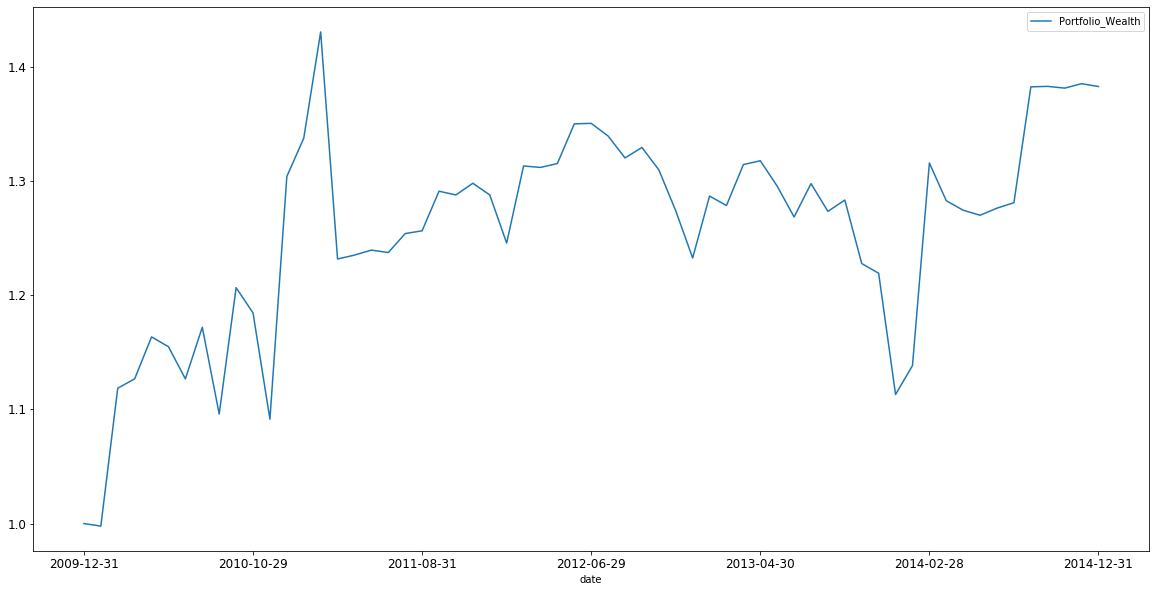

In [143]:
wealth_pd.plot(figsize = (20,10), fontsize = 12)

In [144]:
estimate_paras(10)

(             0
 BAC  -0.007198
 C    -0.020252
 CSCO  0.005887
 CVX   0.005837
 GE   -0.008925
 IBM   0.009026
 INTC -0.001232
 JNJ  -0.000895
 JPM   0.002883
 MRK   0.005112
 MSFT  0.001686
 ORCL  0.014574
 PEP   0.000712
 PFE  -0.003748
 PG    0.001122
 T     0.002660
 VZ    0.001826
 WFC   0.003598
 WMT   0.001241
 XOM   0.001987,
            BAC         C      CSCO       CVX        GE       IBM      INTC  \
 BAC   0.034609  0.033426  0.006747  0.002536  0.014752  0.003383  0.006835   
 C     0.033426  0.043687  0.007804  0.005143  0.017188  0.004143  0.007115   
 CSCO  0.006747  0.007804  0.007099  0.002524  0.005513  0.003129  0.004534   
 CVX   0.002536  0.005143  0.002524  0.003676  0.002597  0.001111  0.002037   
 GE    0.014752  0.017188  0.005513  0.002597  0.011473  0.002752  0.004676   
 IBM   0.003383  0.004143  0.003129  0.001111  0.002752  0.003654  0.002892   
 INTC  0.006835  0.007115  0.004534  0.002037  0.004676  0.002892  0.007156   
 JNJ   0.004549  0.005010  0.00